<img src="http://iict-space.heig-vd.ch/apu/wp-content/uploads/sites/21/2022/01/2020-slim.png" alt="HEIG-VD Logo" width="100" align="right"/>

# Cours TAL - Laboratoire 3 : Analyse syntaxique du français

**Objectifs**

1. Utiliser un analyseur syntaxique **en constituants** pour extraire tous les groupes nominaux d'un texte.
1. Appliquer un analyseur syntaxique **de dépendances** sur des données de test en français et calculer son score.
1. Entraîner l'analyseur **de dépendances** sur des données adaptées et mesurer si les performances se sont améliorées ou non.

## 1.	Utiliser un analyseur syntaxique en constituants pour extraire les groupe nominaux

Vous utiliserez l'analyseur syntaxique en constituants appelé `LexicalizedParser` fourni parmi les outils CoreNLP de Stanford, et [documenté ici](https://nlp.stanford.edu/nlp/javadoc/javanlp/edu/stanford/nlp/parser/lexparser/LexicalizedParser.html).  


* **code Java** : fichier `stanford-corenlp-3.9.2.jar` (8 Mo) fourni sur Cyberlearn
* **modèle** : fichier `frenchFactored.ser.gz` (4 Mo) fourni sur Cyberlearn
* **données** : fichier `exemple.txt` fourni sur Cyberlearn

a. Veuillez écrire la ligne de commande (java) qui effecte l'analyse syntaxique en constituants du texte `exemple.txt`. Choisissez 'oneline' comme format et écrivez les résultats dans un ficher.

In [23]:
!java -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.lexparser.LexicalizedParser \
-outputFormat oneline \
-writeOutputFiles \
frenchFactored.ser.gz exemple.txt

Loading parser from serialized file frenchFactored.ser.gz ... done [0.8 sec].
Parsing file: exemple.txt
edu.stanford.nlp.international.french.process.FrenchLexer: Invalid options key in constructor: splitContractions
Parsing [sent. 1 len. 12]: Les gares voyageurs sont en fait des ensembles fonctionnels plus larges .
Parsing [sent. 2 len. 20]: Elles regroupent toutes les fonctions centrées sur l' accès à le train et l' achat des titres de transport .
Parsing [sent. 3 len. 11]: Elles offrent aussi divers services commerciaux liés à le voyage .
Parsing [sent. 4 len. 16]: Pour certaines gares , le passage de nombreux voyageurs justifie l' installation de fonctions annexes .
Parsing [sent. 5 len. 13]: Il s' agit , par exemple , de commerces et services variés .
Parsing [sent. 6 len. 12]: Les gares peu importantes sont appelées haltes ou points d' arrêt .
Parsing [sent. 7 len. 23]: Le train est un matériel roulant ferroviaire assurant le transport de personnes ou de marchandises sur une lign

b. Importez le fichier de résultats du LexicalizedParser comme une liste d'arbres, en utilisant la classe `BracketParseCorpusReader` de NLTK.  Chaque ligne contenant une analyse syntaxique sera importée comme un objet `Tree` de NLTK. 

In [1]:
from nltk.corpus.reader.bracket_parse import BracketParseCorpusReader

In [11]:
filename = 'exemple.txt.stp'
reader = BracketParseCorpusReader('.', filename)
trees = reader.parsed_sents()

c. Cherchez dans la [documentation](https://www.nltk.org/_modules/nltk/tree.html#Tree) de `Tree` une fonction d'affichage, et affichez l'arbre de la première ligne.

In [16]:
trees[0].pretty_print()

                                   ROOT                                                
                                    |                                                   
                                   SENT                                                
       _____________________________|_______________________________________________    
      NP             |         |                           NP                       |  
  ____|_______       |         |          _________________|_____________           |   
 |    |       AP     VN      MWADV       |      |          AP            AP         |  
 |    |       |      |     ____|____     |      |          |         ____|____      |   
DET   NC     ADJ     V    P         N   DET     NC        ADJ      ADV       ADJ   PUNC
 |    |       |      |    |         |    |      |          |        |         |     |   
Les gares voyageurs sont  en       fait des ensembles fonctionnels plus     larges  .  



d.  Écrivez le code qui extrait les groupes nominaux de toutes les phrases (en anglais: Noun Phrases), et qui affiche les 5 les plus fréquents avec leurs nombres d'occurrences.

In [32]:
from nltk import FreqDist

def exctract_np(tree):
    local_np = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            local_np.append(' '.join(subtree.leaves()))
    return local_np

noun_phrases = []
for tree in trees:
    noun_phrases.extend(exctract_np(tree))

fdist = FreqDist(noun_phrases)
fdist.most_common(5)

[('transport', 2),
 ('Le train', 2),
 ('marchandises', 2),
 ('le mot train', 2),
 ('Les gares voyageurs', 1)]

e. Veuillez répéter l'expérience avec un texte plus long (un texte en français du projet Gutenberg) et afficher les 20 groupes nominaux les plus fréquents.  Veuillez indiquer approximativement combien de temps a pris l'analyse syntaxique.

In [62]:
# Victor Hugo - Les Misérables (Chapitres 1 à 3)
from urllib import request
url = 'https://www.gutenberg.org/cache/epub/17489/pg17489.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')

start_text = 'En 1815, M. Charles-François-Bienvenu Myriel était évêque de Digne.'
end_text = 'Sa conversation était affable et gaie.'
start = raw.find(start_text)
end = raw.find(end_text)
text = raw[start:end]
formattedText = text.replace('\r', '').replace('\n', ' ')

# Save formatted text to file
with open('les_miserables.txt', 'w') as f:
    f.write(formattedText)

In [63]:
!java -Xmx20g -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.lexparser.LexicalizedParser \
-outputFormat oneline \
-writeOutputFiles \
frenchFactored.ser.gz les_miserables.txt

Loading parser from serialized file frenchFactored.ser.gz ... done [0.8 sec].
Parsing file: les_miserables.txt
edu.stanford.nlp.international.french.process.FrenchLexer: Invalid options key in constructor: splitContractions
Parsing [sent. 1 len. 15]: En 1815 , M. Charles - François - Bienvenu Myriel était évêque de Digne .
Parsing [sent. 2 len. 20]: C' était un vieillard d' environ soixante - quinze ans ; il occupait le siège de Digne depuis 1806 .
Parsing [sent. 3 len. 64]: Quoique ce détail ne touche en aucune manière à le fond même de ce que nous avons à raconter , il n' est peut - être pas inutile , ne fût -ce que pour être exact en tout , d' indiquer ici les bruits et les propos qui avaient couru sur son compte à le moment où il était arrivé dans le diocèse .
FactoredParser: exceeded MAX_ITEMS work limit [200000 items]; aborting.
Sentence couldn't be parsed by grammar.... falling back to PCFG parse.
Parsing [sent. 4 len. 29]: Vrai ou faux , ce qu' on dit des hommes tient souvent a

Temps de l'analyse syntaxe pour les trois premiers chapitres des misérables (192 phrases): 5 minutes et 6 secondes.

In [64]:
filename_miserables = 'les_miserables.txt.stp'
reader_miserables = BracketParseCorpusReader('.', filename_miserables)
trees_miserables = reader_miserables.parsed_sents()

In [65]:
noun_phrases_mis = []
for tree in trees_miserables:
    noun_phrases_mis.extend(exctract_np(tree))

fdist_mis = FreqDist(noun_phrases_mis)
fdist_mis.most_common(20)

[('qui', 31),
 ("l' évêque", 16),
 ('M. Myriel', 15),
 ('--', 14),
 ('Digne', 13),
 ("l' hôpital", 8),
 ("qu'", 6),
 ('où', 6),
 ('mademoiselle Baptistine', 5),
 ('_ _', 5),
 ('madame Magloire', 5),
 ('lui', 4),
 ('que', 4),
 ('les autres', 4),
 ("M. l' évêque", 4),
 ('évêque de Digne', 3),
 ('le diocèse', 3),
 ('la révolution', 3),
 ('Paris', 3),
 ('tout', 3)]

## 2. Analyse de dépendances

Dans cette partie, vous utiliserez le [Stanford Dependency Parser](https://nlp.stanford.edu/software/nndep.html), un analyseur fondé sur un réseau de neurones.

* **code Java** : fichier `stanford-corenlp-3.9.2.jar` (8 Mo) fourni sur Cyberlearn (note: on peut le télécharger avec un [package fourni par Stanford](https://nlp.stanford.edu/software/lex-parser.html) ou depuis le [site Maven de Stanford CoreNLP](https://search.maven.org/artifact/edu.stanford.nlp/stanford-corenlp/3.9.2/jar))
* **modèle** : fichier `UD_French.gz` (10 Mo) fourni sur Cyberlearn (note: plusieurs modèles sont disponibles sur le site Maven, dont un package pour le français de 272 MB, mais ici vous aurez seulement besoin du modèle UD pour Universal Dependencies)
* **données** : les mêmes que pour le labo 2, disponibles dans [l'archive ZIP fournie par l'enseignant](https://drive.switch.ch/index.php/s/5ZNllZOApTWHGwH) (mot de passe = reference).  Ces textes en français proviennent du projet [Universal Dependencies (UD)](https://github.com/UniversalDependencies/UD_French-GSD).  Le fichier `fr-ud-train.conllu3` est destiné à l'entraînement, `fr-ud-dev.conllu3` à la validation, et `fr-ud-test.conllu3` à l'évaluation finale.

Pour effectuer les tâches suivantes, utilisez la [documentation](https://nlp.stanford.edu/nlp/javadoc/javanlp/edu/stanford/nlp/parser/nndep/DependencyParser.html) et regardez surtout le `main()` et les exemples données à la fin.

a. Exécuter le parser en Java (avec une commande externe `!java -cp ...` comme au labo 2) en l'appliquant au fichier UD de *test* en français.  Écrivez le résultat détaillé dans un fichier plutôt qu'à l'écran.  Quels sont les deux scores obtenus et que signifient-ils ?


In [34]:
!java -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.nndep.DependencyParser \
  -model UD_French.gz \
  -testFile fr-ud-test.conllu3 \
  -outFile analyse-dep-1.txt

Loading depparse model: UD_French.gz ... 
###################
#Transitions: 81
#Labels: 40
ROOTLABEL: root
PreComputed 99996, Elapsed Time: 3.459 (s)
Initializing dependency parser ... done [4.0 sec].
Test File: fr-ud-test.conllu3
OOV Words: 608 / 10020 = 6,07%
UAS = 55,0699
LAS = 41,1577
DependencyParser parsed 10020 words in 416 sentences in 2,8s at 3625,2 w/s, 150,5 sent/s.


### Scores obtenus:
UAS: 55,0699, LAS: 41,1577

### Signification

TODO

Les scores LAS (Labeled Attachment Score) et UAS (Unlabeled Attachment Score) sont utilisés pour évaluer la précision des analyses de dépendances dans la compréhension du sens des phrases dans les modèles de traitement de langage naturel.

Le score UAS est une mesure de la précision globale du modèle, qui mesure le pourcentage de mots dont la dépendance est correctement prédite sans prendre en compte l'étiquette grammaticale précise de la relation de dépendance.

Le score LAS, quant à lui, mesure la précision du modèle en prenant en compte l'étiquette grammaticale précise de la relation de dépendance. Cela signifie que LAS mesure la précision du modèle à la fois pour prédire la bonne relation de dépendance et pour attribuer la bonne étiquette grammaticale à cette relation.

En général, un score LAS ou UAS élevé indique une meilleure précision du modèle dans la prédiction des dépendances. Ces scores sont couramment utilisés pour comparer les performances de différents modèles d'analyse de dépendances dans le traitement de langage naturel.

TODO: fin ChatGPT

Ces deux labels sont des métriques standards utilisées pour l'évaluation des analyseurs de dépendances. Voici leur signification individuelle ainsi que leurs différences:

UAS: Unlabeled attachment score: on regarde que les flèches

LAS: Labeled attachment score: on regarde aussi les étiquettes des flèches, plus difficile à obtenir car on ne peut pas avoir l'étiquette juste sans avoir la flèche également juste.

## 3. Entraîner l'analyseur de dépendances

a. Veuillez entraîner l'analyseur en suivant les indications suivantes:
* donnez un nouveau nom au modèle qui sera créé (ne pas écraser l'ancien)
* utilisez à la fois `train` et `dev` comme indiqué dans la documentation
* évitez un output trop verbeux en le redirigeant vers un fichier `output.txt` (ajoutez `>output.txt 2>&1` à la commande)
* plusieurs options indiquées dans la documentation peuvent être utiles
  * `-wordCutOff 3` pour traiter seulement les mots apparaissant plus de 3 fois, ce qui évite en particulier le problème des nombres écrits avec un espace (apparaissant 1 fois)
  * `-trainingThreads 4` pour utiliser pleinement votre processeur : indiquez le maximum selon votre modèle
  * `-maxIter 5000` pour arrêter l'entraînement après 5000 itérations (essayez d'abord beaucoup moins pour vous faire une idée du temps, puis si vous le pouvez, allez plus loin que 5000)

In [15]:
!java -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.nndep.DependencyParser \
    -trainFile fr-ud-train.conllu3 \
    -devFile fr-ud-dev.conllu3 \
    -model myModel.gz \
    -wordCutOff 3 \
    -trainingThreads 8 \
    -maxIter 5000 \
    >output.txt 2>&1

b. Quels sont les scores (sur les données de test) du système que vous avez entraîné ?  Comment se comparent-ils avec ceux du système par défaut ?

In [35]:
!java -cp stanford-corenlp-3.9.2.jar edu.stanford.nlp.parser.nndep.DependencyParser \
    -model 'myModel.gz' \
    -testFile 'fr-ud-test.conllu3' \
    -verboseResults false

Loading depparse model: myModel.gz ... 
Loaded TreebankLanguagePack: edu.stanford.nlp.trees.PennTreebankLanguagePack
###################
#Transitions: 91
#Labels: 45
ROOTLABEL: root
PreComputed 100000, Elapsed Time: 0.687 (s)
Initializing dependency parser ... done [1.2 sec].
Test File: fr-ud-test.conllu3
OOV Words: 1100 / 10020 = 10,98%
UAS = 78,1836
LAS = 71,7066
DependencyParser parsed 10020 words in 416 sentences in 0,4s at 22516,9 w/s, 934,8 sent/s.


Ils sont de:
UAS = 78,1836 LAS = 71,7066

Pour comparer, ceux du système par défaut étaient de: UAS = 55,0699 LAS = 41,1577.

Nous observons donc que notre modèle est bien plus performant que le modèle par défaut.

c. En traitant le fichier de logs du parser (après l'entraînement), collectez les scores UAS obtenus sur l'ensemble de développement (ou validation).  Affichez sur un graphe l'évolution du score au cours de l'entraînement.  À quelle itération obtenez-vous la valeur maximale de ce score ? Le nombre d'itérations de l'entraînement vous semble-t-il suffisant  ?

In [18]:
def parse_output(filename):
  uas = {}

  with open(filename, 'r') as f:
    lines = f.readlines()
    currentIteration = 0
    for line in lines:
        if 'Iteration' in line:
            currentIteration = int(line.split(' ')[2])
        if line.startswith('UAS'):
            uas[currentIteration] = float(line.split(':')[1])
  return uas

uas = parse_output('output.txt')

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

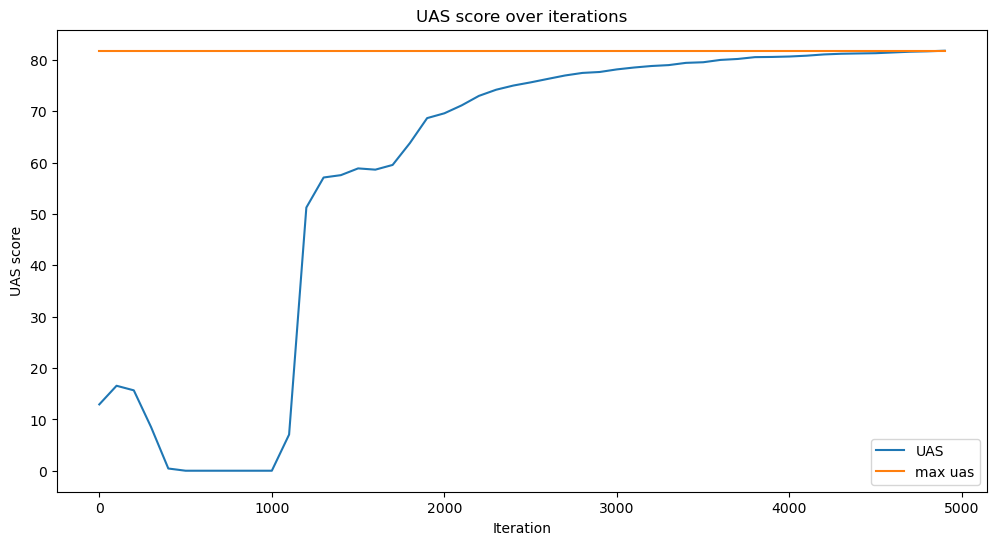

In [32]:
plt.figure(figsize=(12,6))
plt.plot(uas.keys(), uas.values(), label='UAS')
plt.plot(uas.keys(), [max(uas.values())]*len(uas.keys()), label='max uas')
plt.xlabel('Iteration')
plt.ylabel('UAS score')
plt.title('UAS score over iterations')
plt.legend()

L'UAS est calculé toutes les 100 itérations d'entraînement. Le meilleur UAS se trouve à l'itération 4100 avec une valeur de 80.79170277599172.

Cependant, la dernière valeur de l'UAS (lors de l'itération 4900) est la 2ème plus haute de toutes et vaut 81.75617120013419, ce qui est très proche de la valeur maximale.

Nous pouvons donc conclure, également en observant la courbe, que plus d'itérations lors de l'entraînement pourraient être bénéfiques car la courbe augmente encore légèrement, même vers l'itération 5000. Il faut donc regarder si ajouter des itérations améliore assez le score pour justifier le temps supplémentaire d'entraînement, qui est déjà assez élevé (plus de 40min environ).

## Fin du laboratoire 3

Merci de nettoyer votre feuille et de la sauvegarder.  Puis soumettez-la sur Cyberlearn.